In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """The function to predict."""
    return 2*((x-3)*np.sin((x-3))) + 2 + 0.5*x

In [3]:
x = np.atleast_2d(np.linspace(0, 6, 600)).T
y = f(x)

In [4]:
from GPy.kern import Matern52

In [5]:
ker = Matern52(x.shape[1], ARD=True)

In [24]:
Matern52??

In [7]:
GPy.models.GPRegression??

In [8]:
from GPy.mappings.constant import Constant

In [25]:
Constant??

In [9]:
mean_fn = Constant(x.shape[1], 1)
mean_fn

constmap.,value,constraints,priors
C,0.0,,


In [23]:
xx = np.array([[]]).T
GPy.models.GPRegression??

In [16]:
m = GPy.models.GPRegression(xx, xx, kernel=ker, mean_function=mean_fn)

error: failed in converting 2nd keyword `c' of _fblas.dsyrk to C/Fortran array

In [20]:
GPy.models.GPRegression??

In [10]:
m = GPy.models.GPRegression(x, y, kernel=ker, mean_function=mean_fn)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7feb21610160>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7feb21610048>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7feb216108d0>]}

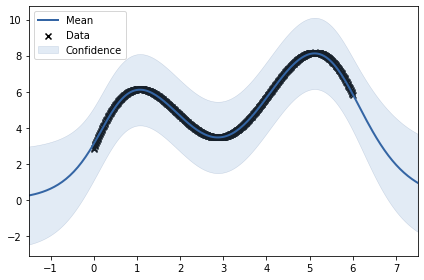

In [11]:
m.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7feb216100b8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7feb1d0d0358>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7feb1d0d0b00>]}

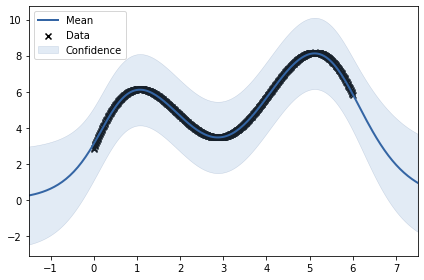

In [12]:
m.plot()

In [13]:
m

GP_regression.,value,constraints,priors
constmap.C,0.0,,
Mat52.variance,1.0,+ve,
Mat52.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [14]:
newx = np.atleast_2d(np.linspace(4, 2, 10)).T

In [15]:
m.predict??

In [16]:
mean, var = m.predict(newx, include_likelihood = False)

In [17]:
y_pred = mean.flatten()
sigma = var.flatten()
newx = newx.flatten()

In [18]:
sigma

array([0.01697674, 0.01697668, 0.01697666, 0.01697666, 0.01697666,
       0.01697666, 0.01697666, 0.01697666, 0.01697668, 0.01697674])

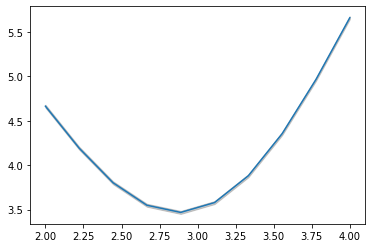

In [19]:
plt.plot(newx, mean)
plt.fill_between(newx, y_pred+sigma, y_pred-sigma,
                 color='gray', 
                 alpha=.4, label=r'$\mu \pm \sigma$')